In [1]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt

#creating fake observed data##########################################################################################
N = 500 #no. stars in population
mu_actual = -1.61 #actual mean of the population
sigma_actual = 0.03 #actual standard deviation of the population
sigma_obs = 0.05 #observataional error (on fake observations)

x_true=np.random.randn(N)*sigma_actual + mu_actual #normal distribution, centered on the mean, scaled by the spread = true values i.e. without uncertanties
x_obs=x_true+np.random.randn(N)*sigma_obs #adds normally distributed error, to the fake observed data.
###########################################################################################

In [2]:
#CREATING THE MODEL##########################################################################################
mu_guess = -1.61 #estimation of actual_mu 
dmu_guess = 0.1 #error of mu_guess, needs to be magnitudes larger than mu_guess, unless we have some idea of what mu and the spread is.
#from the half-normal distribution, the distribution peaks at 0
dsigma = 0.4 #similar to dmu_guess, it needs to be much greater than 0.

model=pm.Model()
with model:
    #how mu and sigma should be distributed, together i believe they are the priors
    mu=pm.Normal('mu',mu_guess,dmu_guess)
    sigma=pm.HalfNormal('sigma',dsigma)
    
    xtrue = pm.Normal('xtrue', mu, sigma, shape=N) #creates simulated populations from the priors
    xobs = pm.Normal('xobs', xtrue, sigma_obs, observed=x_obs) #I think its used to create the posterior by comparing with the 'actual' data, x_obs.
    #shape=N, ensures the simulated populations formt he priors, has the same no. stars as the 'actual' data.
    #observed=x_obs, tells it to compare with the 'actual' data to create a posterior.
###########################################################################################

#Sampling##########################################################################################
with model:
    trace = pm.sample(tune=4000, target_accept=0.99) #defaults to NUTS sampler
    #tune = Number of iterations to tune, defaults to 500
    #target_accept = float in [0, 1]. The step size is tuned such that we approximate this acceptance rate. Higher values like 0.9 or 0.95 often work better for problematic posteriors.
###########################################################################################

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [xtrue, sigma, mu]
Sampling 4 chains: 100%|█████████████████████████████████████████████████████| 18000/18000 [00:54<00:00, 330.83draws/s]
The gelman-rubin statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


In [3]:
#Results##########################################################################################
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
mu,-1.612343,0.002410,0.000081,-1.617161,-1.607745,742.827519,1.000256
xtrue__0,-1.613599,0.021399,0.000395,-1.659145,-1.571088,3617.220640,0.999147
xtrue__1,-1.616038,0.021453,0.000361,-1.658823,-1.572836,3755.577914,0.999080
xtrue__2,-1.622935,0.022729,0.000469,-1.667982,-1.577124,2968.995663,1.001766
xtrue__3,-1.624499,0.021574,0.000504,-1.668874,-1.585119,1517.735873,1.000327
xtrue__4,-1.625177,0.021979,0.000440,-1.670750,-1.585228,2610.759275,0.999685
xtrue__5,-1.611865,0.022375,0.000339,-1.654608,-1.566248,4287.157569,1.000401
xtrue__6,-1.582799,0.023447,0.000837,-1.628668,-1.535061,319.508826,1.007857
xtrue__7,-1.601386,0.022328,0.000431,-1.642079,-1.555230,2857.096729,1.000396
xtrue__8,-1.615463,0.021501,0.000344,-1.658802,-1.575029,4373.580652,1.000522


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001347AF708D0>,
      dtype=object)

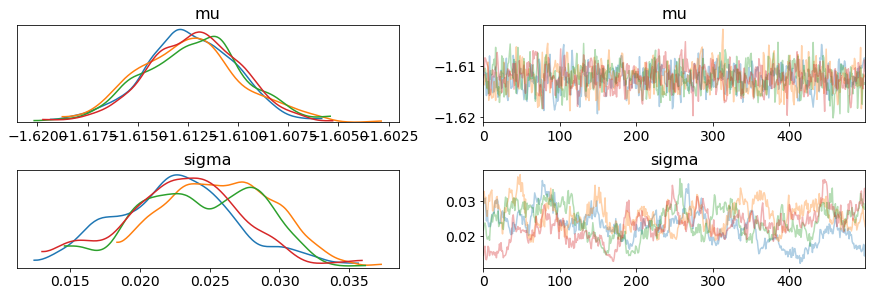

In [4]:
pm.plots.traceplot(trace,var_names=['mu','sigma'])
###########################################################################################

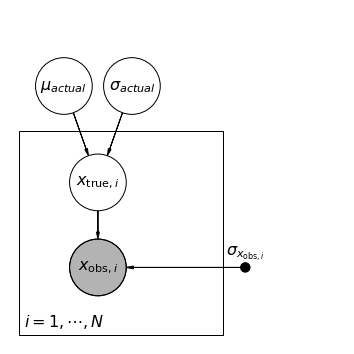

In [5]:
from matplotlib import rc
rc("font", family="serif", size=16)
import daft
pgm = daft.PGM([3,3], grid_unit=4, node_unit=2)
# Hierarchical parameters.
pgm.add_node(daft.Node("mu_actual", r"$\mu_{actual}$", 0.7, 2.6))
pgm.add_node(daft.Node("sigma_actual", r"$\sigma_{actual}$", 1.3, 2.6))
# Add latent variables 
pgm.add_node(daft.Node("x_true", r"$x_{{\rm true},i}$", 1, 1.75))
# Data.
pgm.add_node(daft.Node("x_obs", r"$x_{{\rm obs},i}$", 1, 1, observed=True))
#pgm.add_node(daft.Node("sigma_obs", r"$\sigma_{\rm obs}$", 1.8, 1.0, fixed=True, offset=[0.4,0.4])) puts the error inside the square for when there are multiple observational uncertainties
pgm.add_node(daft.Node("sigma_obs",r"$\sigma_{x_{{\rm obs},i}}$", 2.3, 1.0, fixed=True, offset=[0.4,0.4]))
# Add in the edges.
pgm.add_edge("mu_actual", "x_true")
pgm.add_edge("sigma_actual", "x_true")
pgm.add_edge("x_true", "x_obs")
pgm.add_edge("sigma_obs", "x_obs")
# And a plate.
pgm.add_plate(daft.Plate([0.3, 0.5, 1.8, 1.7], label=r"$i = 1, \cdots, N$",
    shift=-0.1))
# Render and save.
pgm.render()